In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy
import argopy
import scipy.ndimage as filter
import cartopy.crs as ccrs
import cartopy
import xrft
import scipy
import matplotlib
import gsw

In [2]:
import filt_funcs as ff
import EV_funcs as ef

# Load boxes, process xarrays

In [9]:
s_ds=xr.open_dataset("202206/202206_lon:(25,45)_lat:(-60,-50).nc")
s = ff.get_ds_interp(s_ds,0,2000,4)

In [10]:
s1 = s.where(s.TIME.dt.month>0).where(s.TIME.dt.month<4)
s2 = s.where(s.TIME.dt.month>3).where(s.TIME.dt.month<7)
s3 = s.where(s.TIME.dt.month>6).where(s.TIME.dt.month<10)
s4 = s.where(s.TIME.dt.month>9).where(s.TIME.dt.month<13)

s1_SIG0_EV = ef.get_eddy_variance(s1,100,variable='SIG0',bound=True)
s2_SIG0_EV = ef.get_eddy_variance(s2,100,variable='SIG0',bound=True)
s3_SIG0_EV = ef.get_eddy_variance(s3,100,variable='SIG0',bound=True)
s4_SIG0_EV = ef.get_eddy_variance(s4,100,variable='SIG0',bound=True)

In [11]:
so1_ds = xr.open_dataset("202206/202206_lon:(120,130)_lat:(-60,-55).nc")
so1 = ff.get_ds_interp(so1_ds,0,2000,4)
so2_ds = xr.open_dataset("202206/202206_lon:(60,70)_lat:(-60,-55).nc")
so2 = ff.get_ds_interp(so2_ds,0,2000,4)
so3_ds = xr.open_dataset("202206/202206_lon:(0,10)_lat:(-60,-55).nc")
so3 = ff.get_ds_interp(so3_ds,0,2000,4)
so4_ds = xr.open_dataset("202206/202206_lon:(-60,-50)_lat:(-60,-55).nc")
so4 = ff.get_ds_interp(so4_ds,0,2000,4)
so5_ds = xr.open_dataset("202206/202206_lon:(-120,-110)_lat:(-60,-55).nc")
so5 = ff.get_ds_interp(so5_ds,0,2000,4)
so6_ds = xr.open_dataset("202206/202206_lon:(-180,-170)_lat:(-60,-55).nc")
so6 = ff.get_ds_interp(so6_ds,0,2000,4)

In [12]:
so1_SIG0_EV = ef.get_eddy_variance(so1, 100, variable='SIG0',bound=True)
so2_SIG0_EV = ef.get_eddy_variance(so2, 100, variable='SIG0',bound=True)
so3_SIG0_EV = ef.get_eddy_variance(so3, 100, variable='SIG0',bound=True)
so4_SIG0_EV = ef.get_eddy_variance(so4, 100, variable='SIG0',bound=True)
so5_SIG0_EV = ef.get_eddy_variance(so5, 100, variable='SIG0',bound=True)
so6_SIG0_EV = ef.get_eddy_variance(so6, 100, variable='SIG0',bound=True)

In [13]:
np_ds=xr.open_dataset("202206/202206_lon:(-155,-145)_lat:(30,35).nc")
np = ff.get_ds_interp(np_ds,0,2000,4)
na_ds=xr.open_dataset("202206/202206_lon:(-55,-45)_lat:(40,45).nc")
na = ff.get_ds_interp(na_ds,0,2000,4)
so_ds=xr.open_dataset("202206/202206_lon:(30,40)_lat:(-55,-50).nc")
so = ff.get_ds_interp(so_ds,0,2000,4)
io_ds=xr.open_dataset("202206/202206_lon:(90,100)_lat:(-15,-10).nc")
io = ff.get_ds_interp(io_ds,0,2000,4)

In [14]:
np_SIG0_EV = ef.get_eddy_variance(np, 100, variable='SIG0',bound=True)
na_SIG0_EV = ef.get_eddy_variance(na, 100, variable='SIG0',bound=True)
so_SIG0_EV = ef.get_eddy_variance(so, 100, variable='SIG0',bound=True)
io_SIG0_EV = ef.get_eddy_variance(io, 100, variable='SIG0',bound=True)

### Compute spice

In [15]:
s1['SPICE'] = gsw.spiciness0(s1.SA,s1.CT).rename('SPICE')
s2['SPICE'] = gsw.spiciness0(s2.SA,s2.CT).rename('SPICE')
s3['SPICE'] = gsw.spiciness0(s3.SA,s3.CT).rename('SPICE')
s4['SPICE'] = gsw.spiciness0(s4.SA,s4.CT).rename('SPICE')

In [16]:
s1_SPICE_EV = ef.get_eddy_variance(s1, 100, variable='SPICE',bound=True)
s2_SPICE_EV = ef.get_eddy_variance(s2, 100, variable='SPICE',bound=True)
s3_SPICE_EV = ef.get_eddy_variance(s3, 100, variable='SPICE',bound=True)
s4_SPICE_EV = ef.get_eddy_variance(s4, 100, variable='SPICE',bound=True)

In [17]:
so1['SPICE'] = gsw.spiciness0(so1.SA,so1.CT).rename('SPICE')
so2['SPICE'] = gsw.spiciness0(so2.SA,so2.CT).rename('SPICE')
so3['SPICE'] = gsw.spiciness0(so3.SA,so3.CT).rename('SPICE')
so4['SPICE'] = gsw.spiciness0(so4.SA,so4.CT).rename('SPICE')
so5['SPICE'] = gsw.spiciness0(so5.SA,so5.CT).rename('SPICE')
so6['SPICE'] = gsw.spiciness0(so6.SA,so6.CT).rename('SPICE')

In [18]:
so1_SPICE_EV = ef.get_eddy_variance(so1, 100, variable='SPICE',bound=True)
so2_SPICE_EV = ef.get_eddy_variance(so2, 100, variable='SPICE',bound=True)
so3_SPICE_EV = ef.get_eddy_variance(so3, 100, variable='SPICE',bound=True)
so4_SPICE_EV = ef.get_eddy_variance(so4, 100, variable='SPICE',bound=True)

In [19]:
np['SPICE'] = gsw.spiciness0(np.SA,np.CT).rename('SPICE')
na['SPICE'] = gsw.spiciness0(na.SA,na.CT).rename('SPICE')
so['SPICE'] = gsw.spiciness0(so.SA,so.CT).rename('SPICE')
io['SPICE'] = gsw.spiciness0(io.SA,io.CT).rename('SPICE')

In [20]:
np_SPICE_EV = ef.get_eddy_variance(np, 100, variable='SPICE',bound=True)
na_SPICE_EV = ef.get_eddy_variance(na, 100, variable='SPICE',bound=True)
so_SPICE_EV = ef.get_eddy_variance(so, 100, variable='SPICE',bound=True)
io_SPICE_EV = ef.get_eddy_variance(io, 100, variable='SPICE',bound=True)

### Normalized density, spice function

In [195]:
def get_NEV(ds,ds_EV,variable, coarsen_scale=40):
    
    return ((ds_EV.mean('N_PROF')/ get_drho_dz(ds, variable=variable, coarsen_scale=coarsen_scale).mean('N_PROF')**2)**(1/2))

In [166]:
def get_drho_dz (ds, variable, coarsen_scale=5):
    coarsened_rho = ds[variable].coarsen(PRES_INTERPOLATED=coarsen_scale).mean()
    
    drho_dz_coarsened = coarsened_rho.diff('PRES_INTERPOLATED')/(2*coarsen_scale)
    
    drho_dz = drho_dz_coarsened.interp(PRES_INTERPOLATED=ds.PRES_INTERPOLATED)
    
    return drho_dz

In [196]:
s1_SIG0_NEV = get_NEV(s1, s1_SIG0_EV,variable='SIG0')
s2_SIG0_NEV = get_NEV(s2, s2_SIG0_EV,variable='SIG0')
s3_SIG0_NEV = normalized_EV_plot(s3, s3_SIG0_EV,variable='SIG0')
s4_SIG0_NEV = normalized_EV_plot(s4, s4_SIG0_EV,variable='SIG0')

In [197]:
s1_SPICE_NEV = get_NEV(s1, s1_SIG0_EV,variable='SPICE')
s2_SPICE_NEV = normalized_EV_plot(s2, s2_SIG0_EV,variable='SPICE')
s3_SPICE_NEV = normalized_EV_plot(s3, s3_SIG0_EV,variable='SPICE')
s4_SPICE_NEV = normalized_EV_plot(s4, s4_SIG0_EV,variable='SPICE')

In [198]:
so1_SIG0_NEV = get_NEV(so1, so1_SIG0_EV,variable='SIG0')
so2_SIG0_NEV = get_NEV(so2, so2_SIG0_EV,variable='SIG0')
so3_SIG0_NEV = get_NEV(so3, so3_SIG0_EV,variable='SIG0')
so4_SIG0_NEV = get_NEV(so4, so4_SIG0_EV,variable='SIG0')
so5_SIG0_NEV = get_NEV(so5, so5_SIG0_EV,variable='SIG0')
so6_SIG0_NEV = get_NEV(so6, so6_SIG0_EV,variable='SIG0')

In [199]:
so1_SPICE_NEV = get_NEV(so1, so1_SIG0_EV,variable='SPICE')
so2_SPICE_NEV = get_NEV(so2, so2_SIG0_EV,variable='SPICE')
so3_SPICE_NEV = get_NEV(so3, so3_SIG0_EV,variable='SPICE')
so4_SPICE_NEV = get_NEV(so4, so4_SIG0_EV,variable='SPICE')
so5_SPICE_NEV = get_NEV(so5, so5_SIG0_EV,variable='SPICE')
so6_SPICE_NEV = get_NEV(so6, so6_SIG0_EV,variable='SPICE')

In [200]:
na_SIG0_NEV = get_NEV(na, na_SIG0_EV,variable='SIG0')
np_SIG0_NEV = get_NEV(np, np_SIG0_EV,variable='SIG0')
so_SIG0_NEV = get_NEV(so, so_SIG0_EV,variable='SIG0')
io_SIG0_NEV = get_NEV(io, io_SIG0_EV,variable='SIG0')

In [201]:
na_SPICE_NEV = get_NEV(na, na_SIG0_EV,variable='SPICE')
np_SPICE_NEV = get_NEV(np, np_SIG0_EV,variable='SPICE')
so_SPICE_NEV = get_NEV(so, so_SIG0_EV,variable='SPICE')
io_SPICE_NEV = get_NEV(io, io_SIG0_EV,variable='SPICE')

# Methods

In [193]:
A = so1.SIG0.isel(N_PROF=0)
A2 = (so1.SIG0**2).isel(N_PROF=0)
A2l = ef.get_total_variance(so, 100, variable='SIG0').isel(N_PROF=0)

Al = ff.get_filt_single(so, 100, variable='SIG0').isel(N_PROF=0)
Al2 = ef.get_mean_variance(so, 100, variable='SIG0').isel(N_PROF=0)
AEV = ef.get_eddy_variance(so, 100, variable='SIG0').isel(N_PROF=0)

Text(0.5, 1.0, 'A')

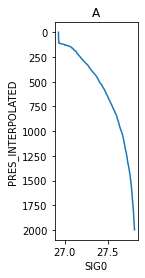

In [194]:
plt.figure(figsize=(1.5,4))
A.plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.title('A')

Text(0.5, 1.0, 'A^2')

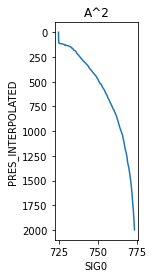

In [30]:
plt.figure(figsize=(1.5,4))
A2.plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.title('A^2')

Text(0.5, 1.0, '<A^2>')

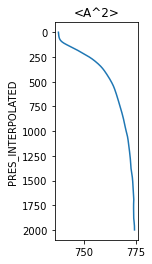

In [31]:
plt.figure(figsize=(1.5,4))
A2l.plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.title('<A^2>')

Text(0.5, 1.0, '<A>')

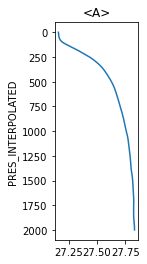

In [32]:
plt.figure(figsize=(1.5,4))
Al.plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.title('<A>')

Text(0.5, 1.0, '<A>^2')

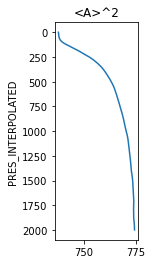

In [33]:
plt.figure(figsize=(1.5,4))
Al2.plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.title('<A>^2')

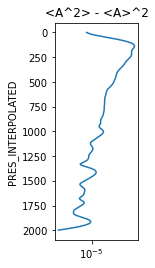

In [34]:
plt.figure(figsize=(1.5,4))
AEV.plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.title('<A^2> - <A>^2')
plt.xscale('log')

# Results: New Try

### Temporal (argo_seasonality)

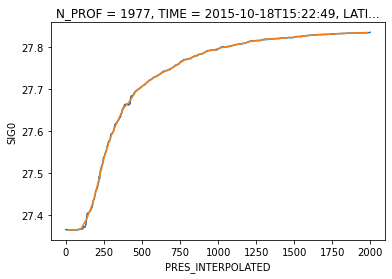

In [120]:
s4.isel(N_PROF=10).SIG0.plot()
s4.isel(N_PROF=10).SIG0.coarsen(PRES_INTERPOLATED=20).mean().plot()

Text(0.5, 1.0, 'drho_dz')

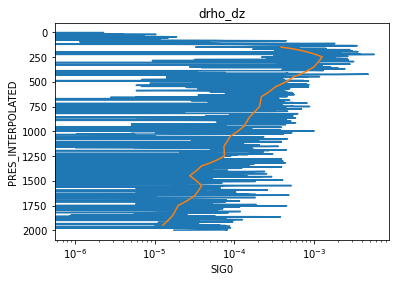

In [132]:
drho_dz(s4,variable='SIG0').isel(N_PROF=10).plot(y='PRES_INTERPOLATED')
new_drho_dz(s4,variable='SIG0',coarsen_scale=50).isel(N_PROF=10).plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.xscale('log')
plt.title('drho_dz')

Text(0.5, 1.0, 'NEV')

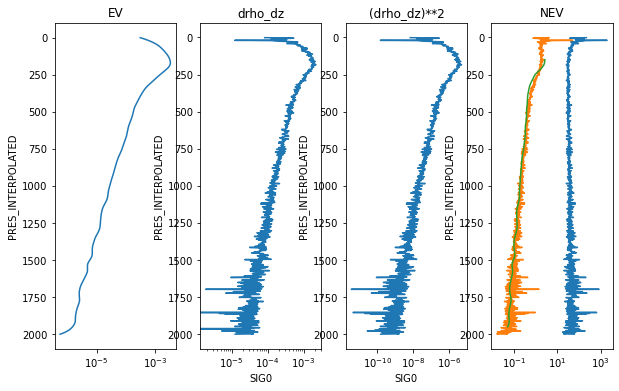

In [138]:
plt.figure(figsize=(10,6))

plt.subplot(1,4,1)
s4_SIG0_EV.mean('N_PROF').plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.xscale('log')
plt.title('EV')

plt.subplot(1,4,2)
drho_dz(s4,variable='SIG0').mean('N_PROF').plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.xscale('log')
plt.title('drho_dz')

plt.subplot(1,4,3)
(drho_dz(s4,variable='SIG0').mean('N_PROF')**2).plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.xscale('log')
plt.title('(drho_dz)**2')

plt.subplot(1,4,4)
s4_SIG0_NEV.plot(y='PRES_INTERPOLATED')
((s4_SIG0_EV.mean('N_PROF')/(drho_dz(s4,variable='SIG0').mean('N_PROF')**2)**(1/2))).plot(y='PRES_INTERPOLATED')
((s4_SIG0_EV.mean('N_PROF')/(new_drho_dz(s4,variable='SIG0',coarsen_scale=50).mean('N_PROF')**2)**(1/2))).plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()
plt.xscale('log')
plt.title('NEV')

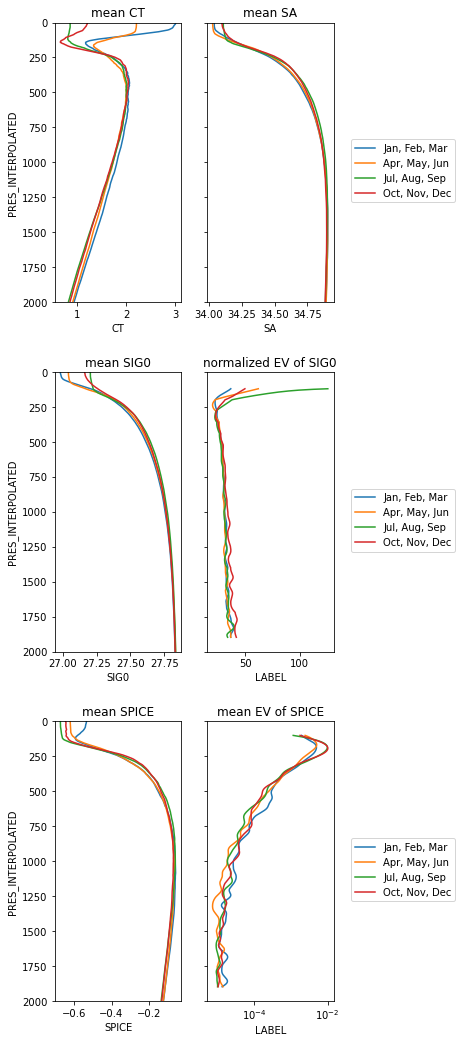

In [209]:
plt.figure(figsize=(5,18))

plt.subplot(3,2,1)
s1.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jan, Feb, Mar')
s2.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Apr, May, Jun')
s3.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jul, Aug, Sep')
s4.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Oct, Nov, Dec')
plt.gca().invert_yaxis()
plt.title('mean CT')
plt.ylim(2000,0)

plt.subplot(3,2,2)
s1.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jan, Feb, Mar')
s2.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Apr, May, Jun')
s3.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jul, Aug, Sep')
s4.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Oct, Nov, Dec')
plt.gca().invert_yaxis()
plt.title('mean SA')
plt.ylabel('')
plt.legend(bbox_to_anchor=(2, 0.6))
plt.yticks(labels=[],ticks=(numpy.arange(0,2001,250)))
plt.ylim(2000,0)

plt.subplot(3,2,3)
s1.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jan, Feb, Mar')
s2.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Apr, May, Jun')
s3.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jul, Aug, Sep')
s4.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Oct, Nov, Dec')
plt.gca().invert_yaxis()
plt.title('mean SIG0')
plt.ylim(2000,0)

plt.subplot(3,2,4)
s1_SIG0_NEV.where(s1_SPICE_NEV.MASK==1).plot(y='PRES_INTERPOLATED', label='Jan, Feb, Mar')
s2_SIG0_NEV.where(s2_SPICE_NEV.MASK==1).plot(y='PRES_INTERPOLATED', label='Apr, May, Jun')
s3_SIG0_NEV.where(s3_SPICE_NEV.MASK==1).plot(y='PRES_INTERPOLATED', label='Jul, Aug, Sep')
s4_SIG0_NEV.where(s4_SPICE_NEV.MASK==1).plot(y='PRES_INTERPOLATED', label='Oct, Nov, Dec')
plt.gca().invert_yaxis()
plt.title('normalized EV of SIG0')
plt.ylabel('')
plt.xlabel('LABEL')
plt.legend(bbox_to_anchor=(2, 0.6))
plt.yticks(labels=[],ticks=(numpy.arange(0,2001,250)))
plt.ylim(2000,0)

plt.subplot(3,2,5)
s1.SPICE.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jan, Feb, Mar')
s2.SPICE.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Apr, May, Jun')
s3.SPICE.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jul, Aug, Sep')
s4.SPICE.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Oct, Nov, Dec')
plt.gca().invert_yaxis()
plt.title('mean SPICE')
plt.ylim(2000,0)

plt.subplot(3,2,6)
s1_SPICE_EV.where(s1_SPICE_NEV.MASK==1).mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jan, Feb, Mar')
s2_SPICE_EV.where(s2_SPICE_NEV.MASK==1).mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Apr, May, Jun')
s3_SPICE_EV.where(s3_SPICE_NEV.MASK==1).mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jul, Aug, Sep')
s4_SPICE_EV.where(s4_SPICE_NEV.MASK==1).mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Oct, Nov, Dec')
plt.gca().invert_yaxis()
plt.title('mean EV of SPICE')
plt.ylabel('')
plt.xlabel('LABEL')
plt.legend(bbox_to_anchor=(2, 0.6))
plt.yticks(labels=[],ticks=(numpy.arange(0,2001,250)))
plt.ylim(2000,0)
plt.xscale('log')

plt.subplots_adjust(wspace=0.2,hspace=0.25)

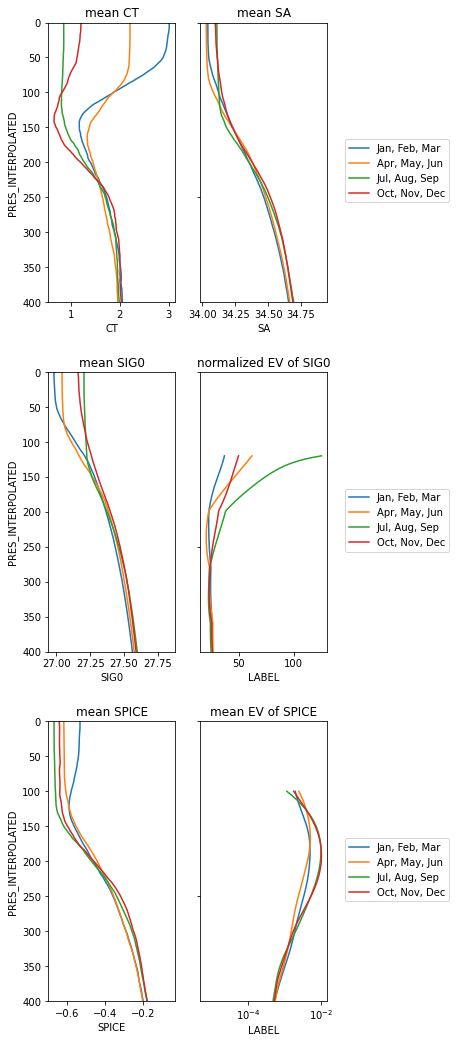

In [221]:
plt.figure(figsize=(5,18))

plt.subplot(3,2,1)
s1.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jan, Feb, Mar')
s2.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Apr, May, Jun')
s3.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jul, Aug, Sep')
s4.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Oct, Nov, Dec')
plt.gca().invert_yaxis()
plt.title('mean CT')
plt.ylim(400,0)

plt.subplot(3,2,2)
s1.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jan, Feb, Mar')
s2.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Apr, May, Jun')
s3.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jul, Aug, Sep')
s4.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Oct, Nov, Dec')
plt.gca().invert_yaxis()
plt.title('mean SA')
plt.ylabel('')
plt.legend(bbox_to_anchor=(2, 0.6))
plt.yticks(labels=[],ticks=(numpy.arange(0,2001,250)))
plt.ylim(400,0)

plt.subplot(3,2,3)
s1.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jan, Feb, Mar')
s2.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Apr, May, Jun')
s3.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jul, Aug, Sep')
s4.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Oct, Nov, Dec')
plt.gca().invert_yaxis()
plt.title('mean SIG0')
plt.ylim(400,0)

plt.subplot(3,2,4)
s1_SIG0_NEV.where(s1_SPICE_NEV.MASK==1).plot(y='PRES_INTERPOLATED', label='Jan, Feb, Mar')
s2_SIG0_NEV.where(s2_SPICE_NEV.MASK==1).plot(y='PRES_INTERPOLATED', label='Apr, May, Jun')
s3_SIG0_NEV.where(s3_SPICE_NEV.MASK==1).plot(y='PRES_INTERPOLATED', label='Jul, Aug, Sep')
s4_SIG0_NEV.where(s4_SPICE_NEV.MASK==1).plot(y='PRES_INTERPOLATED', label='Oct, Nov, Dec')
plt.gca().invert_yaxis()
plt.title('normalized EV of SIG0')
plt.ylabel('')
plt.xlabel('LABEL')
plt.legend(bbox_to_anchor=(2, 0.6))
plt.yticks(labels=[],ticks=(numpy.arange(0,2001,250)))
plt.ylim(400,0)

plt.subplot(3,2,5)
s1.SPICE.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jan, Feb, Mar')
s2.SPICE.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Apr, May, Jun')
s3.SPICE.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jul, Aug, Sep')
s4.SPICE.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Oct, Nov, Dec')
plt.gca().invert_yaxis()
plt.title('mean SPICE')
plt.ylim(400,0)

plt.subplot(3,2,6)
s1_SPICE_EV.where(s1_SPICE_NEV.MASK==1).mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jan, Feb, Mar')
s2_SPICE_EV.where(s2_SPICE_NEV.MASK==1).mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Apr, May, Jun')
s3_SPICE_EV.where(s3_SPICE_NEV.MASK==1).mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Jul, Aug, Sep')
s4_SPICE_EV.where(s4_SPICE_NEV.MASK==1).mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Oct, Nov, Dec')
plt.gca().invert_yaxis()
plt.title('mean EV of SPICE')
plt.ylabel('')
plt.xlabel('LABEL')
plt.legend(bbox_to_anchor=(2, 0.6))
plt.yticks(labels=[],ticks=(numpy.arange(0,2001,250)))
plt.ylim(400,0)
plt.xscale('log')

plt.subplots_adjust(wspace=0.2,hspace=0.25)

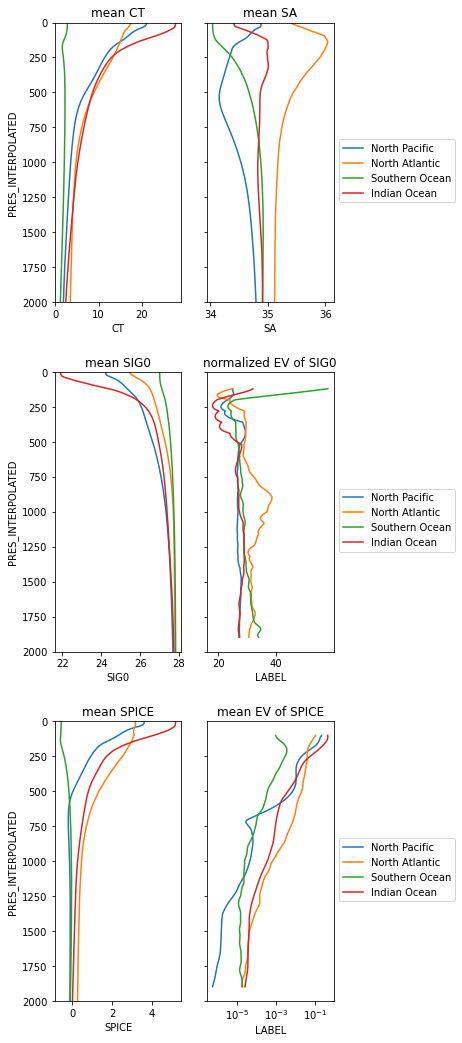

In [219]:
plt.figure(figsize=(5,18))

plt.subplot(3,2,1)
np.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='North Pacific')
na.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='North Atlantic')
so.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Southern Ocean')
io.CT.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Indian Ocean')
plt.gca().invert_yaxis()
plt.title('mean CT')
plt.ylim(2000,0)

plt.subplot(3,2,2)
np.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='North Pacific')
na.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='North Atlantic')
so.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Southern Ocean')
io.SA.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Indian Ocean')
plt.gca().invert_yaxis()
plt.title('mean SA')
plt.ylabel('')
plt.legend(bbox_to_anchor=(2, 0.6))
plt.yticks(labels=[],ticks=(numpy.arange(0,2001,250)))
plt.ylim(2000,0)

plt.subplot(3,2,3)
np.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='North Pacific')
na.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='North Atlantic')
so.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Southern Ocean')
io.SIG0.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Indian Ocean')
plt.gca().invert_yaxis()
plt.title('mean SIG0')
plt.ylim(2000,0)

plt.subplot(3,2,4)
np_SIG0_NEV.where(np_SIG0_NEV.MASK==1).plot(y='PRES_INTERPOLATED', label='North Pacific')
na_SIG0_NEV.where(na_SIG0_NEV.MASK==1).plot(y='PRES_INTERPOLATED', label='North Atlantic')
so_SIG0_NEV.where(so_SIG0_NEV.MASK==1).plot(y='PRES_INTERPOLATED', label='Southern Ocean')
io_SIG0_NEV.where(io_SIG0_NEV.MASK==1).plot(y='PRES_INTERPOLATED', label='Indian Ocean')
plt.gca().invert_yaxis()
plt.title('normalized EV of SIG0')
plt.ylabel('')
#plt.xscale('log')
plt.xlabel('LABEL')
plt.legend(bbox_to_anchor=(2, 0.6))
plt.yticks(labels=[],ticks=(numpy.arange(0,2001,250)))
plt.ylim(2000,0)

plt.subplot(3,2,5)
np.SPICE.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='North Pacific')
na.SPICE.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='North Atlantic')
so.SPICE.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Southern Ocean')
io.SPICE.mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Indian Ocean')
plt.gca().invert_yaxis()
plt.title('mean SPICE')
plt.ylim(2000,0)

plt.subplot(3,2,6)
np_SPICE_EV.where(np_SPICE_NEV.MASK==1).mean('N_PROF').plot(y='PRES_INTERPOLATED', label='North Pacific')
na_SPICE_EV.where(na_SPICE_NEV.MASK==1).mean('N_PROF').plot(y='PRES_INTERPOLATED', label='North Atlantic')
so_SPICE_EV.where(so_SPICE_NEV.MASK==1).mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Southern Ocean')
io_SPICE_EV.where(io_SPICE_NEV.MASK==1).mean('N_PROF').plot(y='PRES_INTERPOLATED', label='Indian Ocean')
plt.gca().invert_yaxis()
plt.title('mean EV of SPICE')
plt.ylabel('')
plt.xscale('log')
plt.xlabel('LABEL')
plt.legend(bbox_to_anchor=(2, 0.6))
plt.yticks(labels=[],ticks=(numpy.arange(-1,2001,250)))
plt.ylim(2000,0)


plt.subplots_adjust(wspace=0.2,hspace=0.25)